---
# <center> Лабораторна робота №8 </center>
## **Тема. Структура даних граф. Алгоритми на графах**
## **Мета:** засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.
---

## <center> Хід роботи </center>

### **1.** Створюємо Notebook-документ і реалізовуємо контрольні приклади, що розглядаються у цій роботі, та виконуємо завдання, що надано на самостійну роботу.
### <center> Завдання для самостійної роботи </center>

#### **1)** Для варіанту, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі.

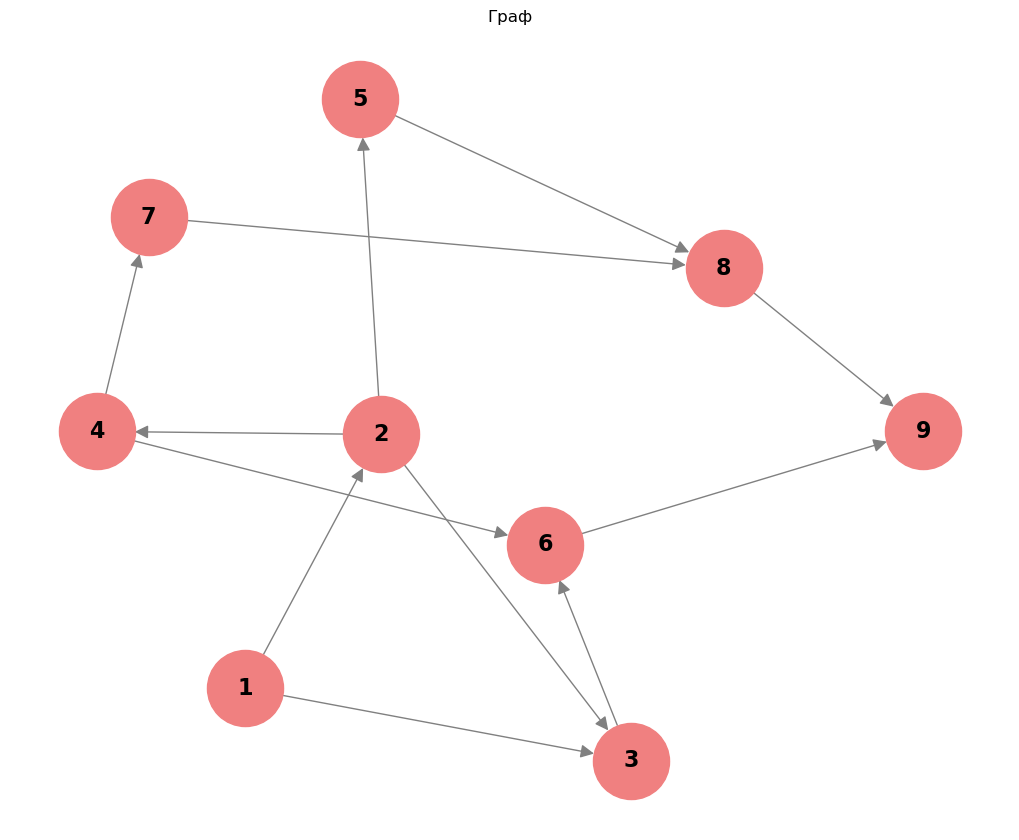

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо орієнтований граф
G = nx.DiGraph()

# Додаємо вузли
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Додаємо орієнтовані ребра між вузлами
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (4, 7),
    (5, 8), (6, 9), (7, 8), (8, 9), (4, 6), (2, 3)
])

# Візуалізація графа
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Використовуємо spring layout для більш естетичного вигляду

# Малюємо орієнтований граф з мітками вузлів
nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=3000, font_size=16, font_weight='bold', arrowsize=20)

# Показуємо граф
plt.title("Граф")
plt.show()


#### **2)** Для свого варіанту реалізувати всі алгоритми, згідно з прикладами, наведеними вище.

In [44]:
#Реалізація алгоритму Дейкстри:
import heapq

def dijkstra(graph, start):
    # Крок 1: ініціалізація відстаней до всіх вершин як нескінченність, крім стартової вершини
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    
    # Крок 2: ініціалізація пріоритетної черги (heap) для зберігання мінімальних відстаней
    priority_queue = [(0, start)]  # (відстань, вершина)
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        # Якщо поточна відстань вже більша за зафіксовану, пропускаємо цю вершину
        if current_distance > distances[current_vertex]:
            continue
        
        # Крок 3: перевірка всіх сусідів поточної вершини
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            
            # Якщо знайдена менша відстань до сусіда, оновлюємо відстань
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

# Приклад графа у вигляді списку суміжності з вагами
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Запуск алгоритму Дейкстри для знаходження найкоротших шляхів від вершини 'A'
start_vertex = 'A'
distances = dijkstra(graph, start_vertex)

# Виведення результату
print("Найкоротші відстані від вершини", start_vertex)
for vertex, distance in distances.items():
    print(f"Відстань від {start_vertex} до {vertex}: {distance}")


Найкоротші відстані від вершини A
Відстань від A до A: 0
Відстань від A до B: 1
Відстань від A до C: 3
Відстань від A до D: 4


In [46]:
#Реалізація алгоритму Беллмана-Форда:
def bellman_ford(graph, start):
    # Крок 1: ініціалізація відстаней до всіх вершин як нескінченність, крім стартової вершини
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    # Крок 2: розслаблення всіх ребер |V| - 1 разів
    for _ in range(len(graph) - 1):
        for vertex in graph:
            for neighbor, weight in graph[vertex].items():
                if distances[vertex] + weight < distances[neighbor]:
                    distances[neighbor] = distances[vertex] + weight

    # Крок 3: перевірка на негативні цикли
    for vertex in graph:
        for neighbor, weight in graph[vertex].items():
            if distances[vertex] + weight < distances[neighbor]:
                raise ValueError("Граф містить негативний цикл")

    return distances

# Приклад графа у вигляді списку суміжності з вагами
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Запуск алгоритму Беллмана-Форда для знаходження найкоротших шляхів від вершини 'A'
start_vertex = 'A'
try:
    distances = bellman_ford(graph, start_vertex)
    print("Найкоротші відстані від вершини", start_vertex)
    for vertex, distance in distances.items():
        print(f"Відстань від {start_vertex} до {vertex}: {distance}")
except ValueError as e:
    print(e)


Найкоротші відстані від вершини A
Відстань від A до A: 0
Відстань від A до B: 1
Відстань від A до C: 3
Відстань від A до D: 4


In [48]:
# Реалізація пошуку в глибину (DFS) за допомогою рекурсії
def dfs(graph, vertex, visited=None):
    if visited is None:
        visited = set()  # множина для збереження відвіданих вершин
    visited.add(vertex)  # позначаємо поточну вершину як відвідану
    print(vertex, end=" ")  # виводимо поточну вершину
    for neighbor in graph[vertex]:  # для кожного сусіда поточної вершини
        if neighbor not in visited:  # якщо сусід ще не відвіданий
            dfs(graph, neighbor, visited)  # рекурсивно відвідуємо сусіда
    return visited

# Приклад графа у вигляді списку суміжності
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Викликаємо DFS з початкової вершини 'A'
print("Результат пошуку в глибину (DFS):")
dfs(graph, 'A')


Результат пошуку в глибину (DFS):
A B D E F C 

{'A', 'B', 'C', 'D', 'E', 'F'}

In [50]:
# Реалізація пошуку в ширину (BFS)
from collections import deque
def bfs(graph, start):
    visited = set()  # множина для збереження відвіданих вершин
    queue = deque([start])  # черга для вершин, які треба обробити
    visited.add(start)  # позначаємо початкову вершину як відвідану
    while queue:
        vertex = queue.popleft()  # витягуємо поточну вершину з черги
        print(vertex, end=" ")  # виводимо поточну вершину
        for neighbor in graph[vertex]:  # для кожного сусіда поточної вершини
            if neighbor not in visited:  # якщо сусід ще не відвіданий
                visited.add(neighbor)  # позначаємо його як відвіданого
                queue.append(neighbor)  # додаємо його в чергу для подальшої обробки
    return visited

# Приклад графа у вигляді списку суміжності
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Викликаємо BFS з початкової вершини 'A'
print("Результат пошуку в ширину (BFS):")
bfs(graph, 'A')


Результат пошуку в ширину (BFS):
A B C D E F 

{'A', 'B', 'C', 'D', 'E', 'F'}

### **2.** Надаємо відповіді на контрольні запитання.
### <center> Контрольні питання </center>

#### **1)** Що таке граф у термінах теорії графів? Наведіть приклади реальних  ситуацій, де можна застосовувати графи.
Граф у теорії графів — це математична структура, що складається з множини вершин (або вузлів) і множини ребер (або дуг), які з'єднують деякі пари цих вершин. Формально граф визначається як $G = (V, E)$, де: $V$ — множина вершин (nodes), $E$ — множина ребер (edges), кожне ребро є парою $(u, v)$, де $u, v \in V$.

Граф може бути:

- Орієнтованим (directed): Ребра мають напрямок.
- Неорієнтованим (undirected): Ребра не мають напрямку.
- Зваженим (weighted): Ребра мають вагу.

Приклади реальних ситуацій, де можна застосовувати графи:
- Соціальні мережі.
- Комп'ютерні мережі.
- Транспортні системи.
- Електричні мережі.
- Алгоритми пошуку в інтернеті.
- Генетика і біоінформатика.
- Логістика та оптимізація.
- Геймдизайн і штучний інтелект.

#### **2)** Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.
**Основні види графів:**
- Орієнтований граф (Directed Graph): Ребра мають напрямок, задаються як впорядковані пари $(u, v)$. Приклад: граф підписок у соцмережах.
- Неорієнтований граф (Undirected Graph): Ребра не мають напрямку, задаються як невпорядковані пари ${u, v}$. Приклад: граф друзів у соцмережах.
- Зважений граф (Weighted Graph): Кожному ребру приписана вага (наприклад, відстань). Приклад: карта міст із дорогами.
- Дерево (Tree): Зв’язаний граф без циклів, має $n$ вершин і $n-1$ ребер.
- Циклічний та ациклічний графи: Циклічний має цикли, а ациклічний — ні. Приклад: орієнтований ациклічний граф (DAG).

**Відмінності між орієнтованими та неорієнтованими графами:**
- Орієнтований граф: Ребра мають напрямок, застосовується для односпрямованих зв’язків.
- Неорієнтований граф: Ребра без напрямку, застосовується для симетричних зв’язків (дружба, дороги).

#### **3)** Як можна представити граф у пам’яті комп'ютера? Опишіть структури  даних, які використовуються для зберігання графів.
**Структури для представлення графів:**
1. Матриця суміжності (Adjacency Matrix):
- Двовимірний масив $n \times n$, де $n$ — кількість вершин.
- Підходить для щільних графів.
- Переваги: швидкий доступ до пари вершин ($O(1)$).
- Недоліки: велика витрата пам'яті для розріджених графів.

2. Список суміжності (Adjacency List):
- Кожна вершина має список своїх сусідів.
- Підходить для розріджених графів.
- Переваги: економія пам'яті, швидкий доступ до сусідів.
- Недоліки: доступ до пари вершин займає $O(k)$, де $k$ — кількість сусідів.

3. Список ребер (Edge List):
- Список всіх ребер у вигляді пар вершин.
- Простий у реалізації, але неефективний для пошуку сусідів.

4. Зважені графи:
- Для зважених графів можна додавати ваги до структур (наприклад, в список суміжності або матрицю).

**Вибір структури:**
- Матриця суміжності: для щільних графів.
- Список суміжності: для розріджених графів.
- Список ребер: для зберігання всіх ребер.

#### **4)** Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть  приклади ситуацій, де застосовується цей алгоритм.
BFS — це алгоритм пошуку на графі, який використовує чергу для відвідування всіх вершин графа по черзі, починаючи з заданої вершини. Алгоритм поступово розглядає всі сусідні вершини на поточному рівні, а потім переходить до наступного рівня.

**Кроки:**
- Ініціалізується черга та відвідані вершини.
- Початкова вершина додається в чергу та позначається як відвідана.
- Поки черга не пуста: вилучається вершина з черги; всі її непосещені сусіди додаються в чергу.

**Складність:**
- Часова складність: $O(V + E)$, де $V$ — кількість вершин, $E$ — кількість ребер.
- Просторова складність: $O(V)$, оскільки потрібно зберігати відвідані вершини та чергу.


**Приклади застосувань:**
- Пошук найкоротшого шляху: В ненавантажених графах BFS допомагає знайти найкоротший шлях між двома вершинами.
- Визначення компонент зв'язності: BFS можна використовувати для перевірки, чи є два вузли в одній компоненті зв'язності.
- Розв'язування задач на рівнях (наприклад, пошук в лабіринті).
- Аналіз соціальних мереж: Для знаходження друзів на відстані 2 (або більше).

#### **5)** Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.
DFS — це алгоритм пошуку на графі, який досліджує якнайглибше кожну гілку графа перед тим, як повернутися і досліджувати інші гілки. Алгоритм використовує рекурсію або стек для відстеження шляху.

Відмінності між DFS і BFS:

**Підхід:**

- DFS: Пошук йде в глибину — спочатку відвідуються всі можливі вершини в межах однієї гілки.
- BFS: Пошук йде в ширину — рівень за рівнем відвідуються всі сусіди.

**Структура даних:**

- DFS: Використовує стек (рекурсивно або вручну).
- BFS: Використовує чергу.

**Порядок відвідування вершин:**

- DFS: Вершини відвідуються по черзі в межах кожної гілки.
- BFS: Вершини відвідуються рівнями, починаючи з початкової вершини.

**Приклади застосувань DFS:**
- Пошук компонент зв'язності: Для перевірки, чи є два вузли в одній компоненті зв'язності в ненаправленому графі.
- Виявлення циклів: Алгоритм DFS можна використовувати для виявлення циклів у графі.
- Топологічне сортування: У орієнтованих ациклічних графах (DAG) для визначення порядку виконання задач.
- Рішення задач з деревами (наприклад, пошук в глибині на дереві).
- Розв'язування лабіринтів та задач на графах, де важлива рекурсивна глибина пошуку.

**Переваги та недоліки:**

1. Стек через масив (список):

**Переваги:**
- Легко реалізувати.
- Операції push, pop та peek займають $O(1)$ часу в середньому (амортизовано).
- Менше накладних витрат пам'яті порівняно зі списком, оскільки використовуються послідовні блоки пам'яті.

**Недоліки:**
- Потрібен перерозподіл пам'яті (коли масив перевищує певний розмір).
- Потенційно неефективне використання пам'яті, якщо стек має змінний розмір.

2. Стек через зв'язаний список:

**Переваги:**
- Динамічний розмір, немає необхідності в перерозподілі пам'яті.
- Кожен елемент займає лише стільки пам'яті, скільки потрібно для зберігання значення та посилання.

**Недоліки:**
- Більш складна реалізація.
- Вищі накладні витрати пам'яті через додаткові посилання на наступний елемент для кожного елемента.
- Трохи повільніше через додаткові операції з пам'яттю (наприклад, виділення пам'яті для кожного вузла).

#### 6) Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?
Алгоритм Дейкстри — це алгоритм для знаходження найкоротшого шляху від однієї вершини до всіх інших у графі з невід'ємними вагами ребер. Він працює за принципом жадібного підходу, поступово уточнюючи найкоротші шляхи до вершин.

1. Кроки алгоритму:

**Ініціалізація:**
- Встановити відстань до початкової вершини рівною 0, а для всіх інших вершин — нескінченністю.
- Всі вершини позначаються як невідвідані.

**Вибір поточної вершини:**

- Обираємо з невідвіданих вершин ту, для якої відстань найменша.

**Оновлення відстаней:**

- Для кожної сусідньої вершини, яка може бути досягнута через поточну, обчислюємо відстань, яку можна отримати через поточну вершину. Якщо вона менша за вже відому відстань, оновлюємо її.

**Повторення:**

- Поточну вершину позначаємо як відвідану і повторюємо кроки 2 і 3 для наступних вершин, поки не відвідаємо всі вершини.

**Завершення:**

- Алгоритм завершується, коли всі вершини оброблені або найкоротші шляхи знайдені.

**Умови для успішної роботи алгоритму:**
- Невід'ємні ваги: Алгоритм Дейкстри працює лише з графами, в яких всі ребра мають невід'ємні ваги. Якщо в графі є ребра з від'ємними вагами, алгоритм може дати неправильний результат.
- Зв'язність графа: Граф має бути зв'язним, щоб алгоритм міг знайти шляхи до всіх вершин. Якщо деякі вершини недосяжні від початкової, їх відстані залишатимуться нескінченними.

